In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Heart Disease.csv to Heart Disease.csv


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("Heart Disease.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
missing=data.isnull().sum()

In [ ]:
missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
num_col=data.select_dtypes(include=["int","float"]).columns

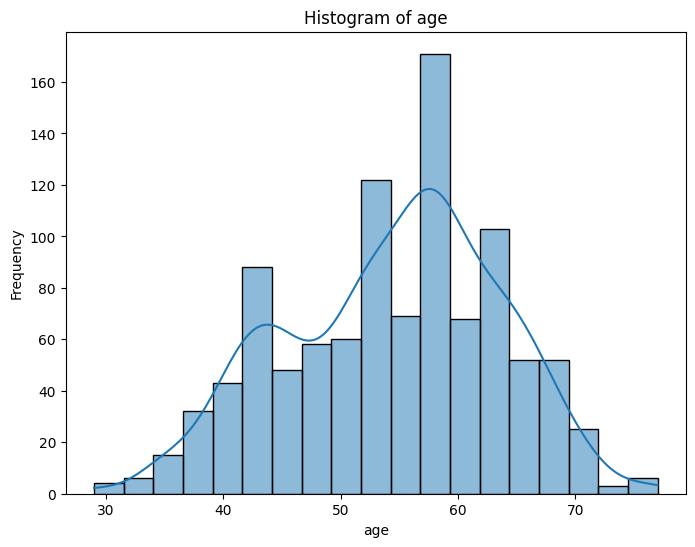

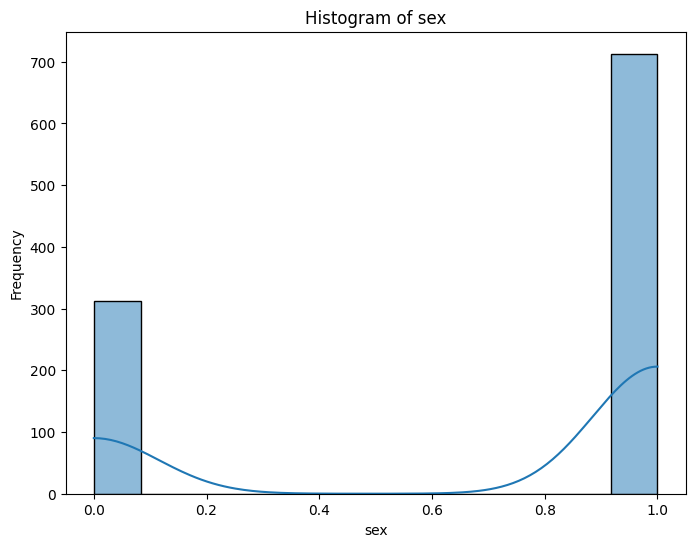

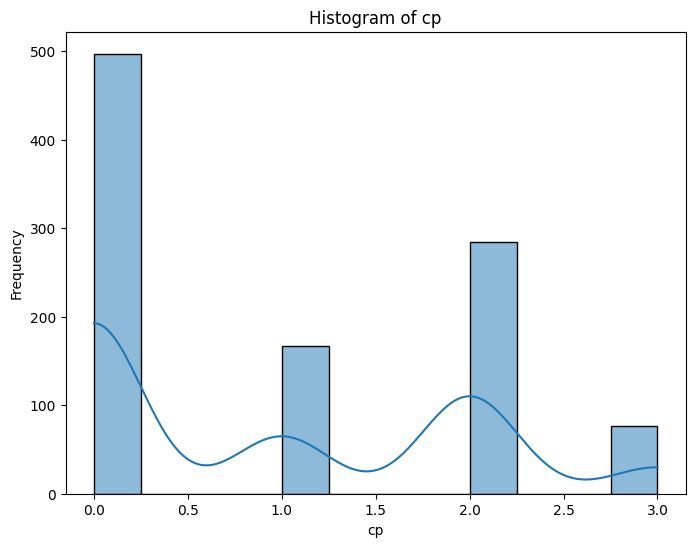

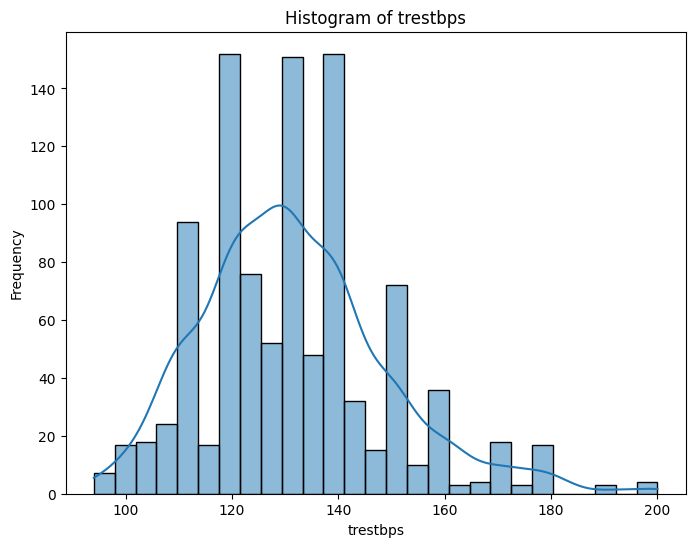

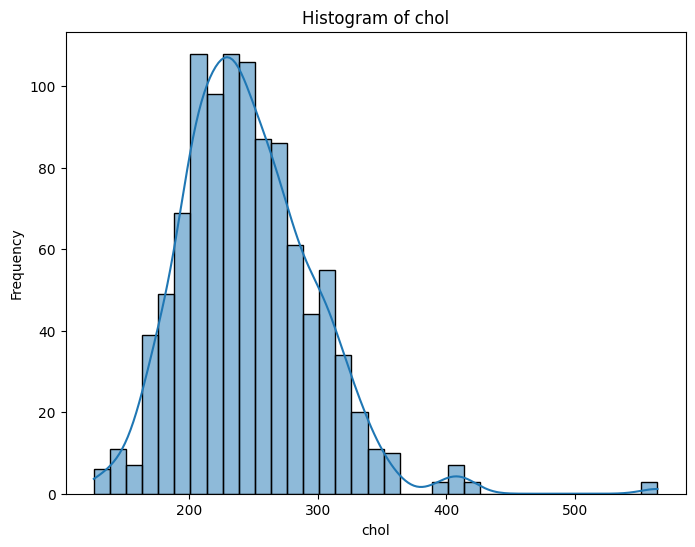

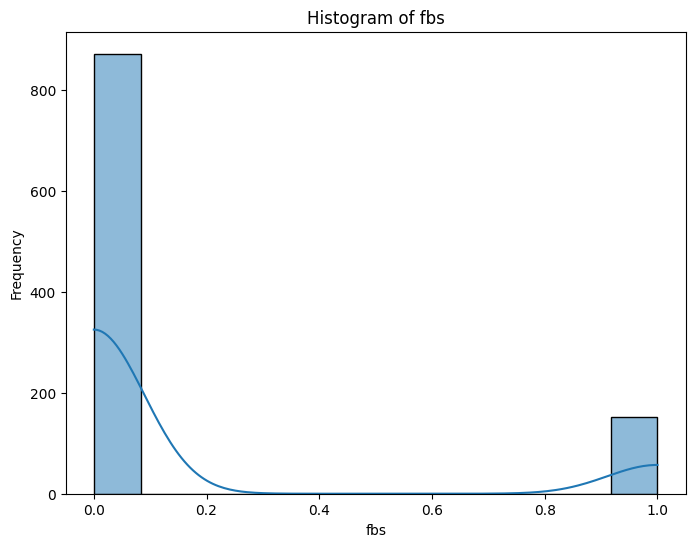

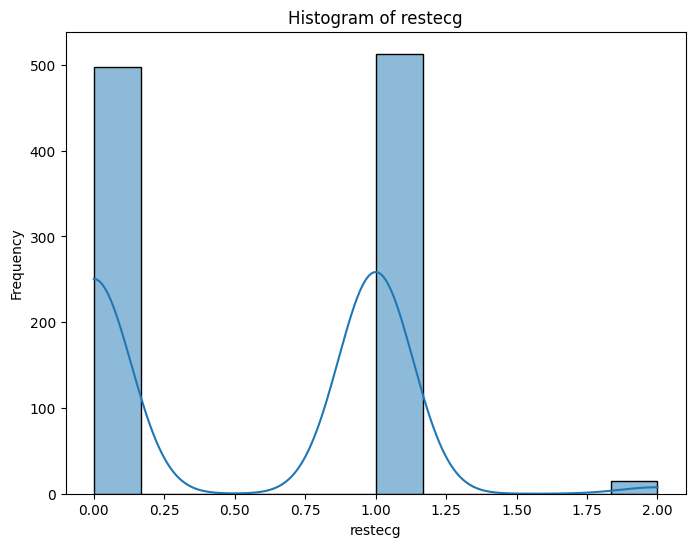

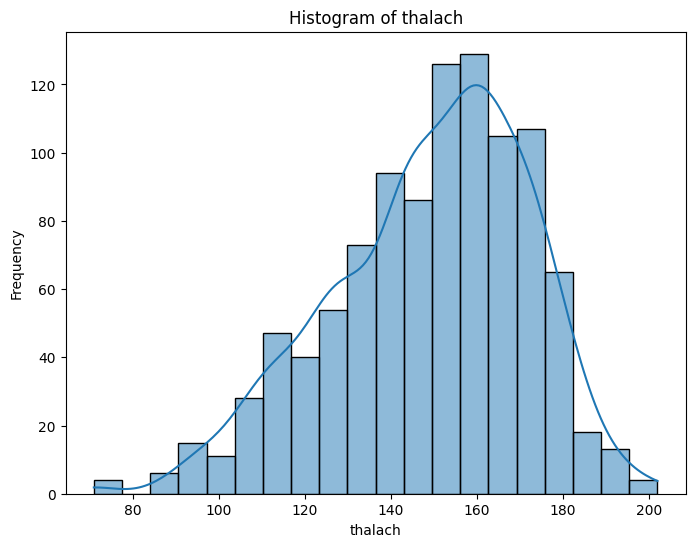

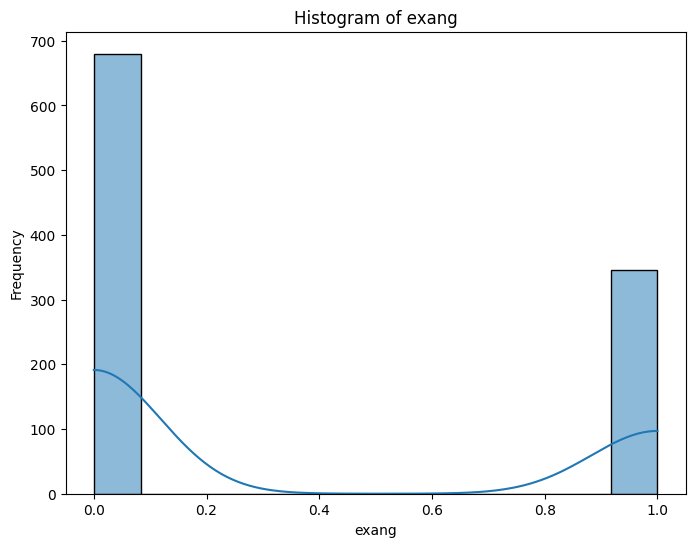

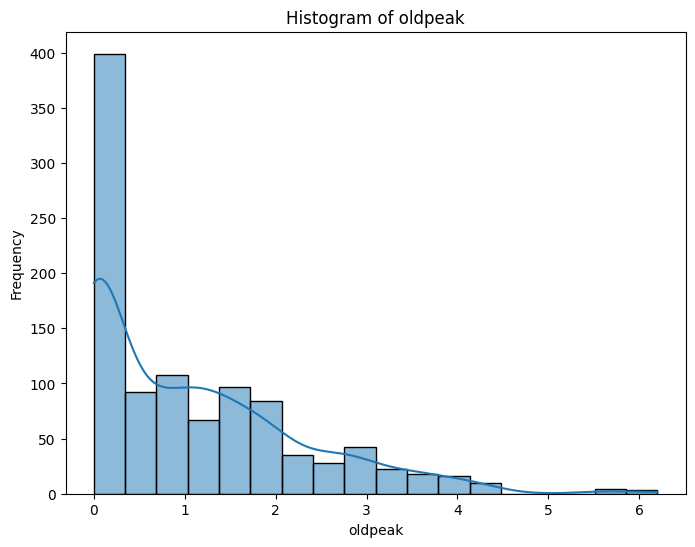

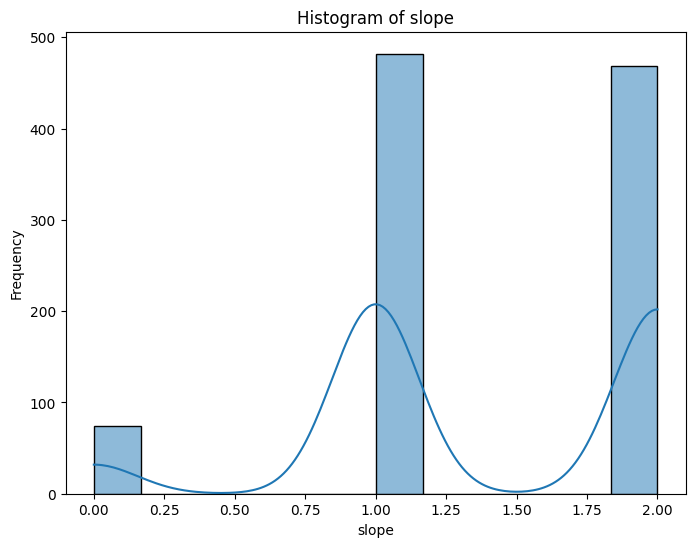

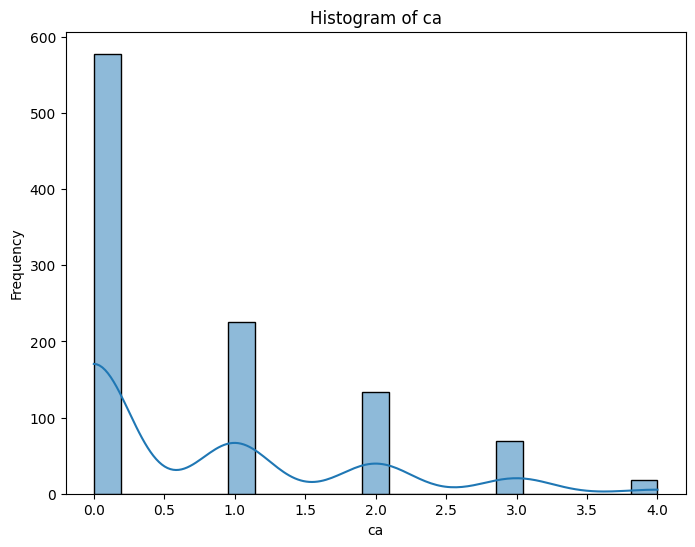

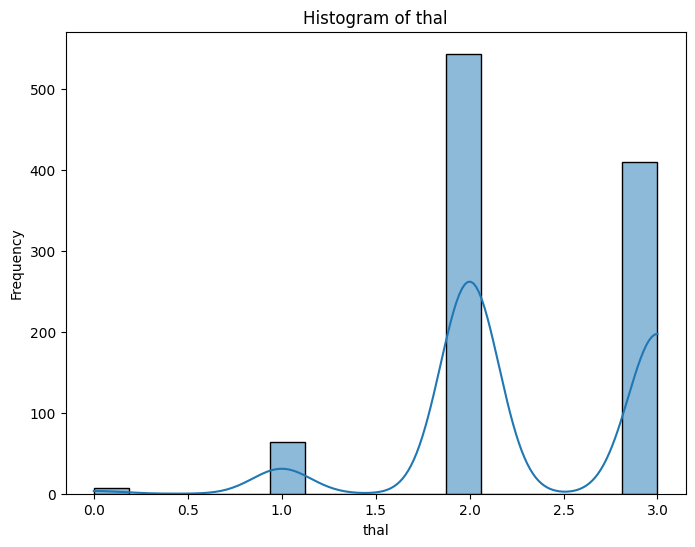

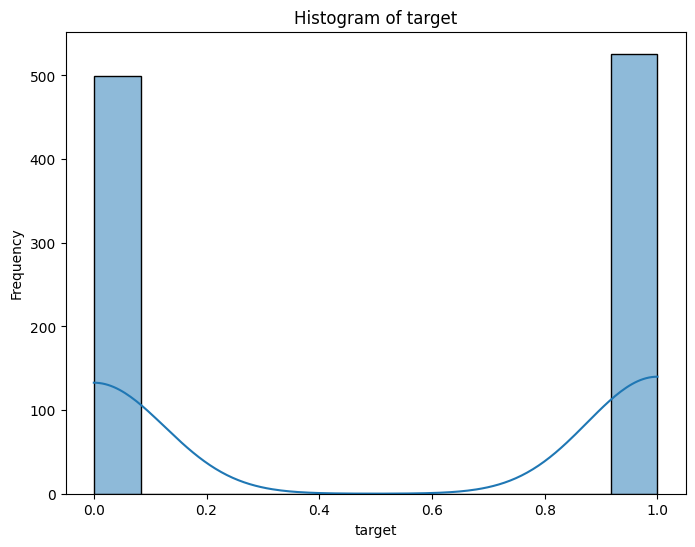

In [ ]:
for column in num_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

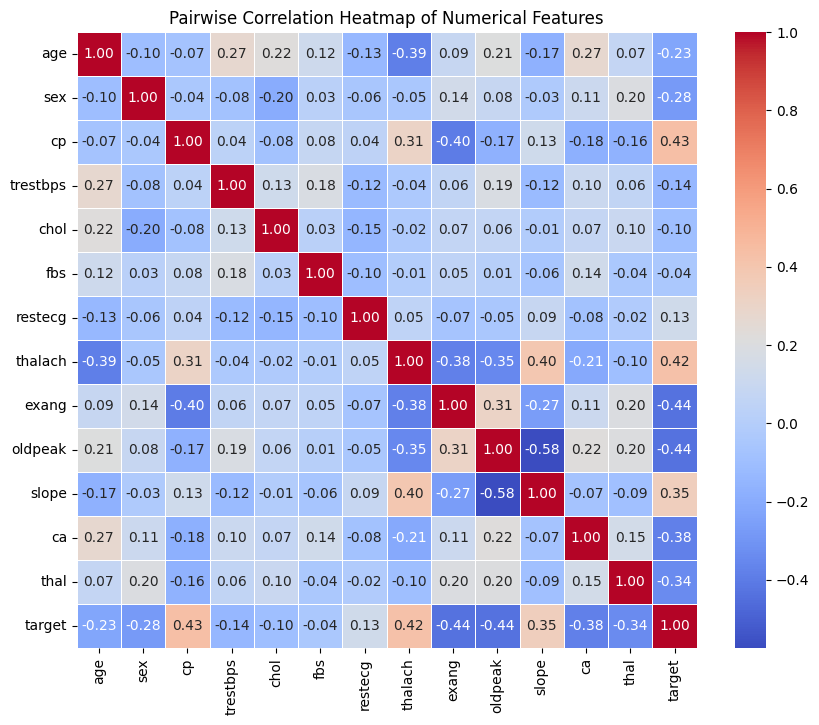

In [ ]:
# Compute pairwise correlations between numerical features
correlation_matrix = data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap of Numerical Features')
plt.show()


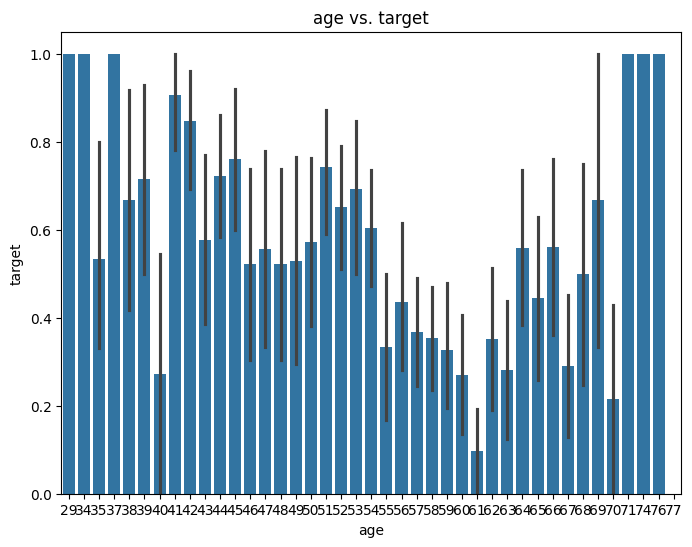

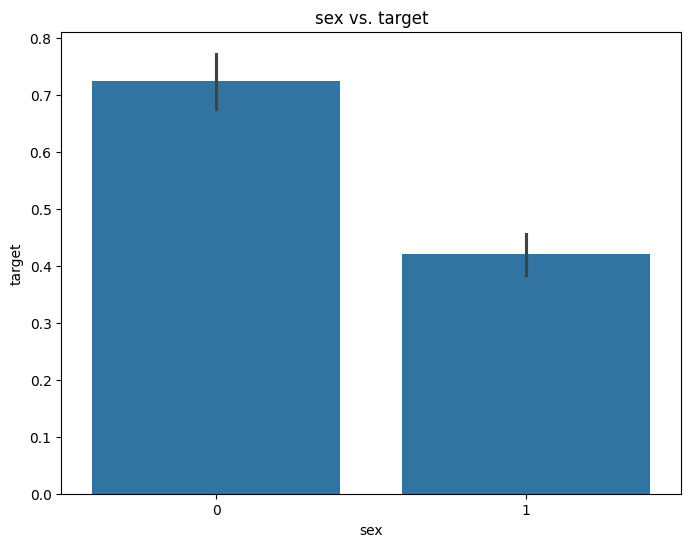

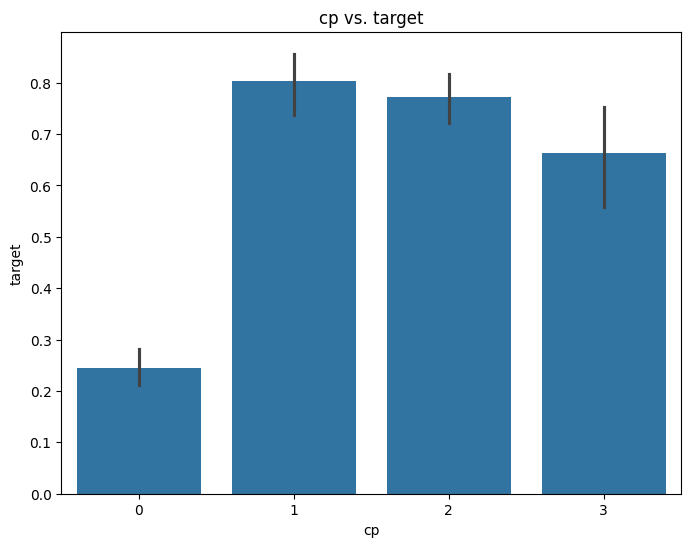

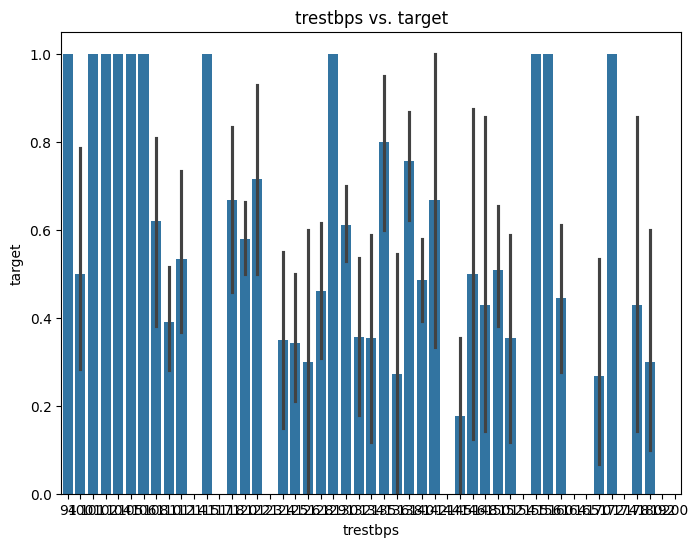

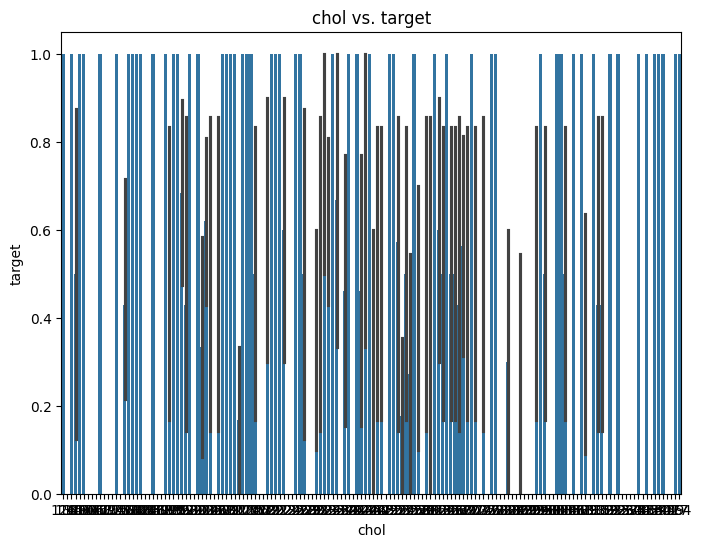

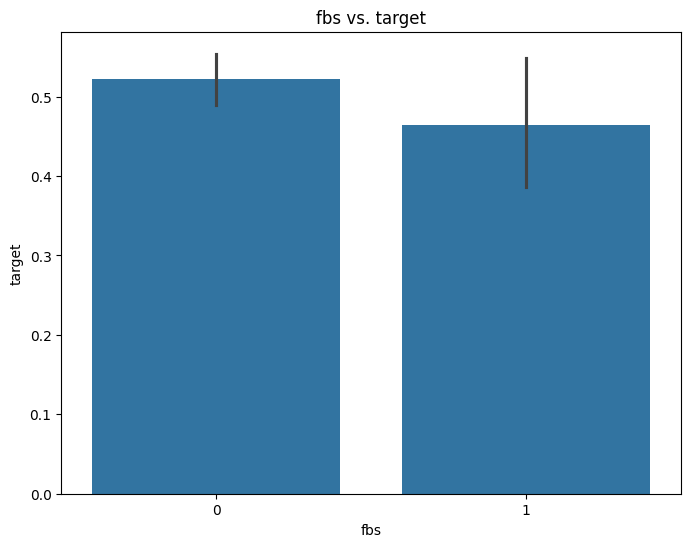

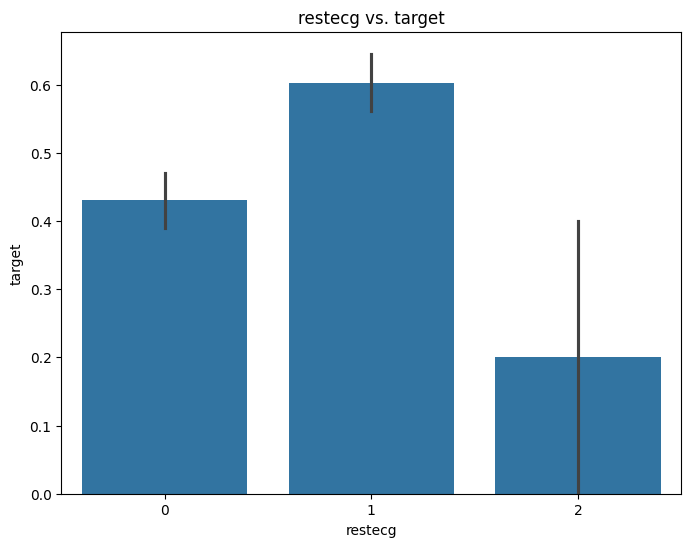

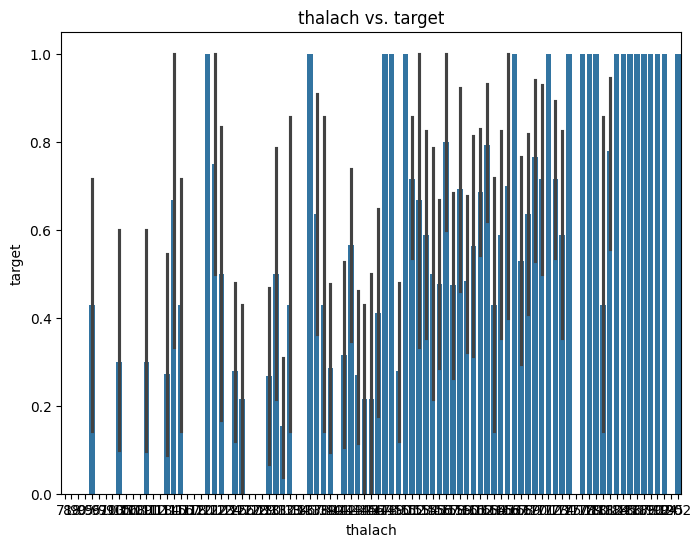

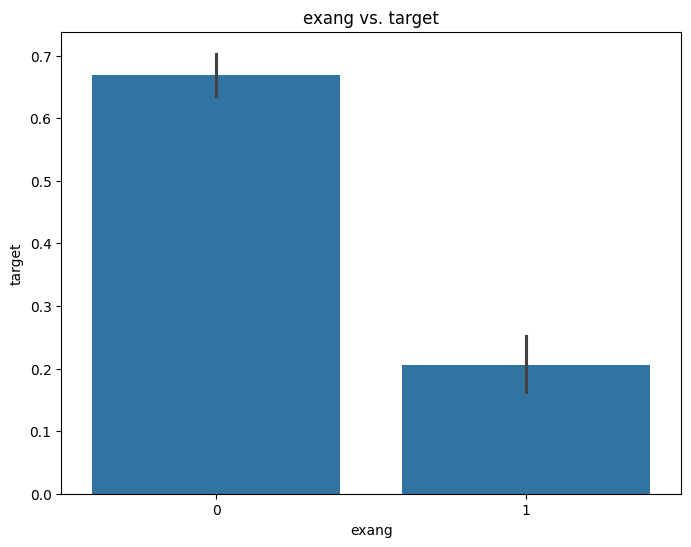

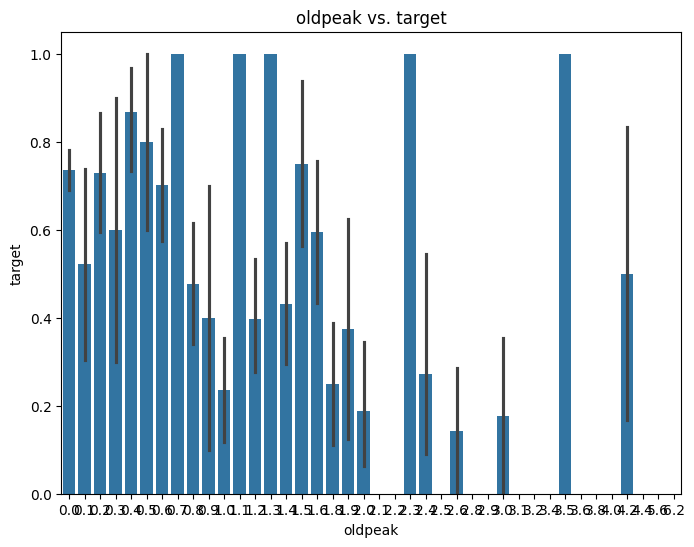

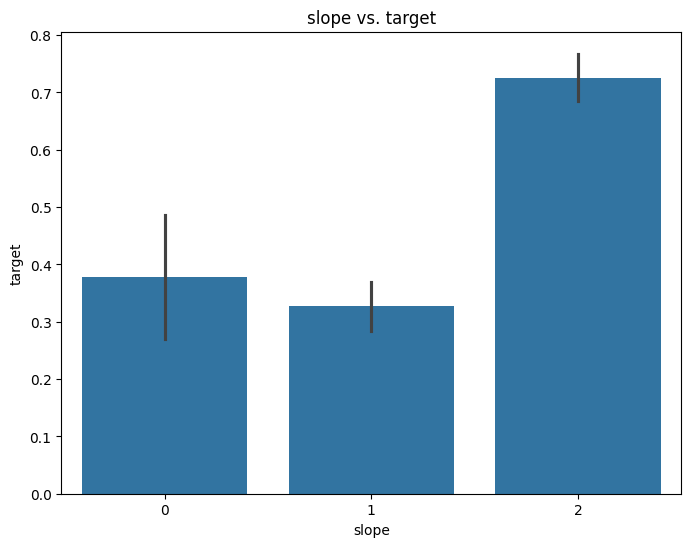

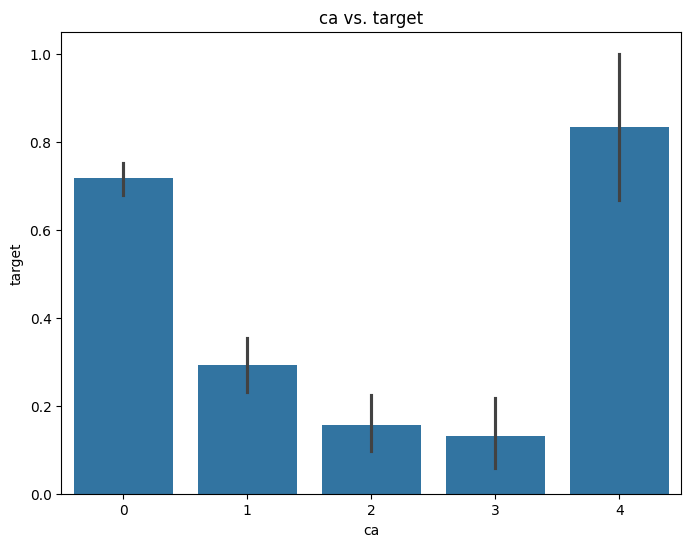

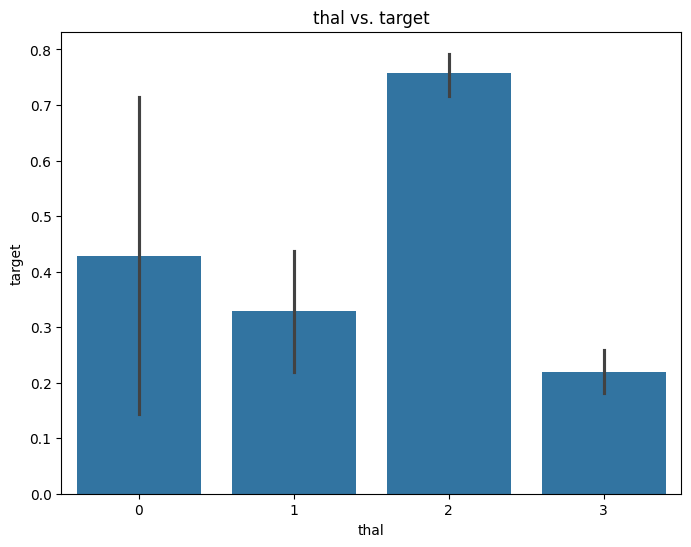

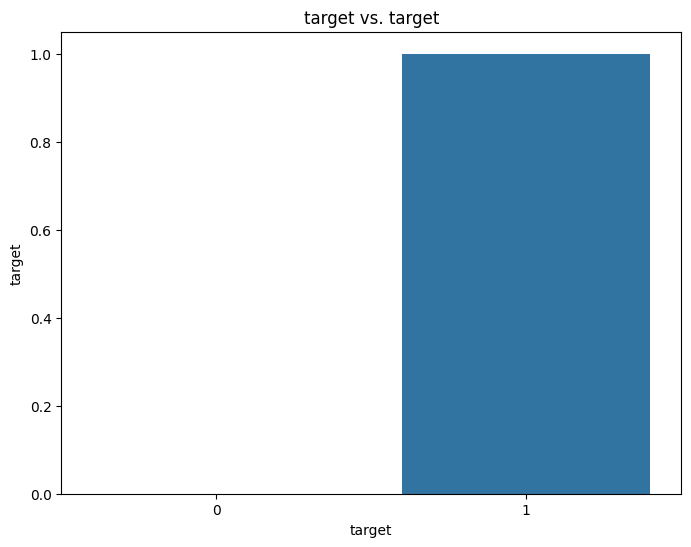

In [ ]:
target_column_name = 'target'

# Plot bar plots for categorical features vs. target variable
for column in num_col:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y=target_column_name, data=data)
    plt.title(f'{column} vs. {target_column_name}')
    plt.xlabel(column)
    plt.ylabel(target_column_name)
    plt.show()


In [ ]:
import networkx as nx

In [ ]:
# Create an empty graph
G = nx.Graph()
# Add nodes to the graph, with attributes based on dataset columns
for idx, row in data.iterrows():
    # Add node with unique identifier (index) and attributes (features)
    G.add_node(idx, **row)

In [ ]:
import numpy as np

# Define a function to calculate Euclidean distance between two instances
def euclidean_distance(instance1, instance2):
    # Convert instances to NumPy arrays for easy computation
    instance1_array = np.array(instance1)
    instance2_array = np.array(instance2)

    # Calculate Euclidean distance
    distance = np.linalg.norm(instance1_array - instance2_array)
    return distance

# Define a similarity threshold (you can adjust this based on your requirements)
similarity_threshold = 5  # For example

# Define relationships between nodes and add edges to the graph
for i in range(len(data)):
    for j in range(i+1, len(data)):
        # Calculate similarity between instances based on attributes
        similarity = euclidean_distance(data.iloc[i], data.iloc[j])

        # Check if similarity is below the threshold
        if similarity < similarity_threshold:
            G.add_edge(i, j)


In [ ]:
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix

# Convert the graph into adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert DataFrame into node feature matrix
# Assume 'features' contains the list of features/columns in your dataset
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
node_features = data[features].values

# Standardize node features (optional)
# You may choose to normalize or standardize the features based on your requirements
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
node_features_scaled = scaler.fit_transform(node_features)

# Convert the node feature matrix to a sparse matrix (optional)
# Sparse matrices can be more memory-efficient, especially for large datasets
node_features_sparse = csr_matrix(node_features_scaled)


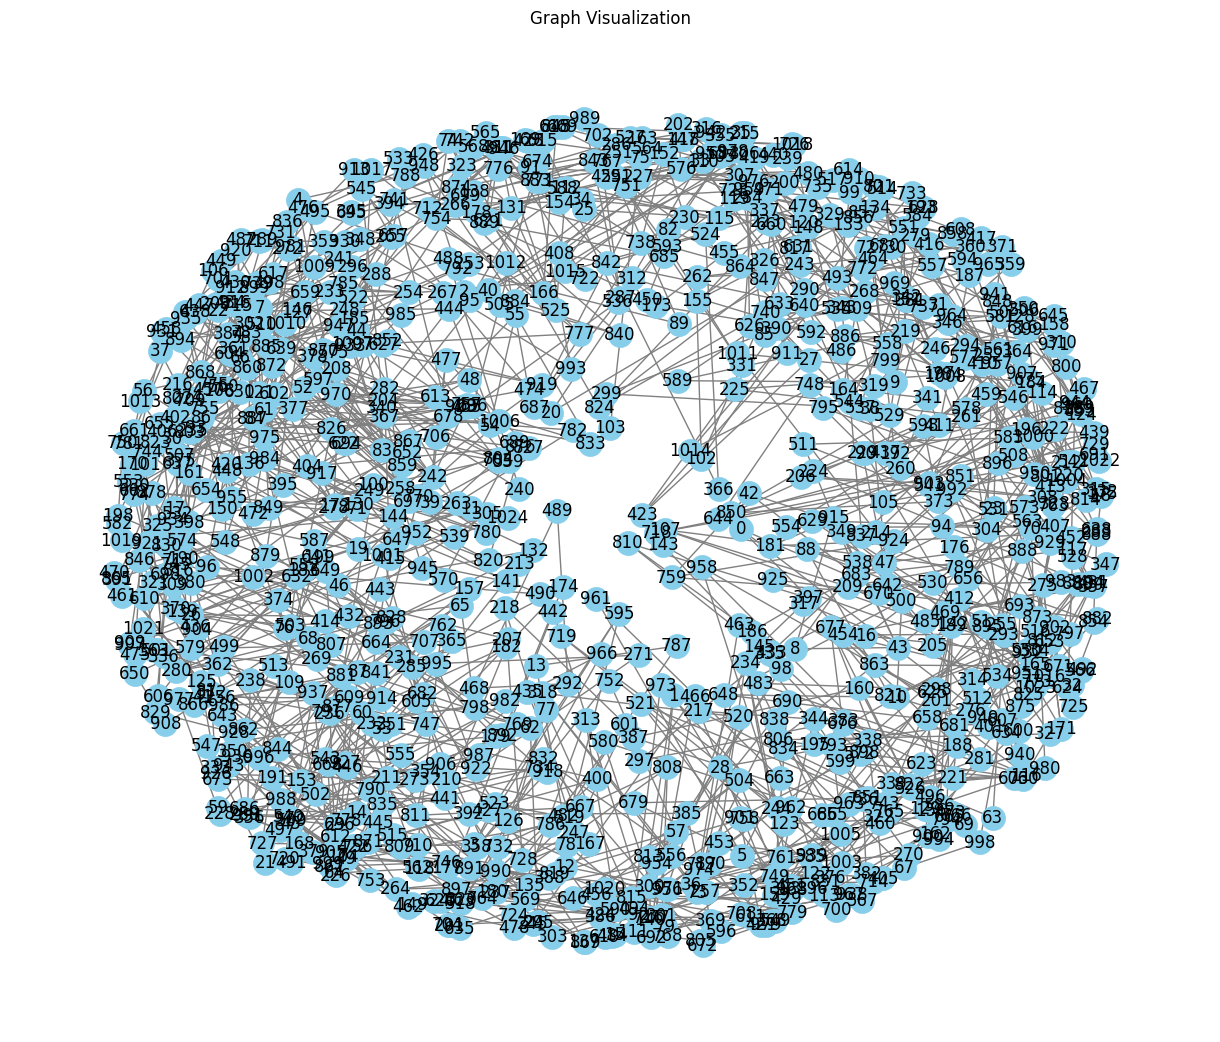

In [ ]:
import matplotlib.pyplot as plt

# Visualize the graph with adjusted parameters
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjust layout parameters
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5)
plt.title("Graph Visualization")
plt.show()


In [ ]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builde

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import networkx as nx

In [ ]:
# Assuming your CSV has 13 columns as features and one column as the target variable
features = data.iloc[:, :-1].values.astype(float)
labels = data.iloc[:, -1].values.astype(int)

# Normalize input features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert the data into PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float)
x_test = torch.tensor(x_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Construct a graph from features (using a simple K-nearest neighbors approach)
# You may need to adjust the parameters of the K-nearest neighbors algorithm based on your data
G = nx.karate_club_graph()
edge_index = torch.tensor(list(G.edges)).t().contiguous()

# Define a PyTorch Geometric Data object
graph_data = Data(x=x_train, edge_index=edge_index, y=y_train)

In [ ]:
# Define the Graph Neural Network model
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 64)  # Increase hidden units
        self.conv2 = GCNConv(64, num_classes)   # Adjust to match num_classes

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)  # Increase dropout
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
# Instantiate the model
num_features = x_train.shape[1]  # Number of features
num_classes = len(torch.unique(y_train))  # Number of classes
model = GCN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)  # Decrease learning rate, add L2 regularization
criterion = torch.nn.CrossEntropyLoss()


In [ ]:
# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss

In [ ]:
# Test the model
def test():
    model.eval()
    logits = model(graph_data.x, graph_data.edge_index)
    pred = logits.argmax(dim=1)
    correct = pred.eq(graph_data.y).sum().item()
    return correct / len(graph_data.y)

In [ ]:
# Main training loop
for epoch in range(300):  # Increase number of epochs
    loss = train()
    acc = test()
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

Epoch: 1, Loss: 0.9086, Accuracy: 0.4305
Epoch: 2, Loss: 0.8849, Accuracy: 0.4500
Epoch: 3, Loss: 0.8754, Accuracy: 0.4598
Epoch: 4, Loss: 0.8471, Accuracy: 0.4841
Epoch: 5, Loss: 0.8338, Accuracy: 0.4976
Epoch: 6, Loss: 0.8466, Accuracy: 0.5146
Epoch: 7, Loss: 0.8103, Accuracy: 0.5293
Epoch: 8, Loss: 0.8015, Accuracy: 0.5451
Epoch: 9, Loss: 0.7675, Accuracy: 0.5598
Epoch: 10, Loss: 0.7976, Accuracy: 0.5549
Epoch: 11, Loss: 0.7222, Accuracy: 0.5537
Epoch: 12, Loss: 0.7332, Accuracy: 0.5683
Epoch: 13, Loss: 0.7042, Accuracy: 0.5902
Epoch: 14, Loss: 0.7074, Accuracy: 0.6073
Epoch: 15, Loss: 0.6897, Accuracy: 0.6280
Epoch: 16, Loss: 0.6817, Accuracy: 0.6378
Epoch: 17, Loss: 0.6704, Accuracy: 0.6561
Epoch: 18, Loss: 0.6749, Accuracy: 0.6598
Epoch: 19, Loss: 0.6440, Accuracy: 0.6671
Epoch: 20, Loss: 0.6213, Accuracy: 0.6768
Epoch: 21, Loss: 0.6346, Accuracy: 0.6829
Epoch: 22, Loss: 0.6211, Accuracy: 0.7024
Epoch: 23, Loss: 0.6115, Accuracy: 0.7024
Epoch: 24, Loss: 0.5838, Accuracy: 0.7220
E

In [ ]:
# Test the model on the test set
with torch.no_grad():
    model.eval()
    logits = model(x_test, edge_index)
    pred = logits.argmax(dim=1)
    test_acc = pred.eq(y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7805


In [ ]:

# Define the Graph Neural Network model
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 128)
        self.conv2 = GCNConv(128, 64)
        self.conv3 = GCNConv(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GCN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)  # Adjusted learning rate and weight decay
criterion = torch.nn.CrossEntropyLoss()

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss

# Test the model
def test():
    model.eval()
    logits = model(graph_data.x, graph_data.edge_index)
    pred = logits.argmax(dim=1)
    correct = pred.eq(graph_data.y).sum().item()
    return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train()
    acc = test()
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
with torch.no_grad():
    model.eval()
    logits = model(x_test, edge_index)
    pred = logits.argmax(dim=1)
    test_acc = pred.eq(y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {test_acc:.4f}')

Epoch: 1, Loss: 0.7656, Accuracy: 0.5122
Epoch: 2, Loss: 0.7447, Accuracy: 0.5415
Epoch: 3, Loss: 0.7513, Accuracy: 0.5780
Epoch: 4, Loss: 0.7359, Accuracy: 0.6134
Epoch: 5, Loss: 0.7246, Accuracy: 0.6707
Epoch: 6, Loss: 0.6900, Accuracy: 0.7085
Epoch: 7, Loss: 0.6813, Accuracy: 0.7171
Epoch: 8, Loss: 0.6812, Accuracy: 0.7305
Epoch: 9, Loss: 0.6557, Accuracy: 0.7390
Epoch: 10, Loss: 0.6572, Accuracy: 0.7646
Epoch: 11, Loss: 0.6376, Accuracy: 0.7707
Epoch: 12, Loss: 0.6355, Accuracy: 0.7744
Epoch: 13, Loss: 0.6268, Accuracy: 0.7780
Epoch: 14, Loss: 0.5930, Accuracy: 0.7817
Epoch: 15, Loss: 0.6085, Accuracy: 0.7890
Epoch: 16, Loss: 0.5876, Accuracy: 0.7988
Epoch: 17, Loss: 0.5815, Accuracy: 0.8024
Epoch: 18, Loss: 0.5772, Accuracy: 0.8183
Epoch: 19, Loss: 0.5633, Accuracy: 0.8171
Epoch: 20, Loss: 0.5649, Accuracy: 0.8220
Epoch: 21, Loss: 0.5473, Accuracy: 0.8232
Epoch: 22, Loss: 0.5429, Accuracy: 0.8280
Epoch: 23, Loss: 0.5350, Accuracy: 0.8317
Epoch: 24, Loss: 0.5120, Accuracy: 0.8366
E

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[72 30]
 [10 93]]


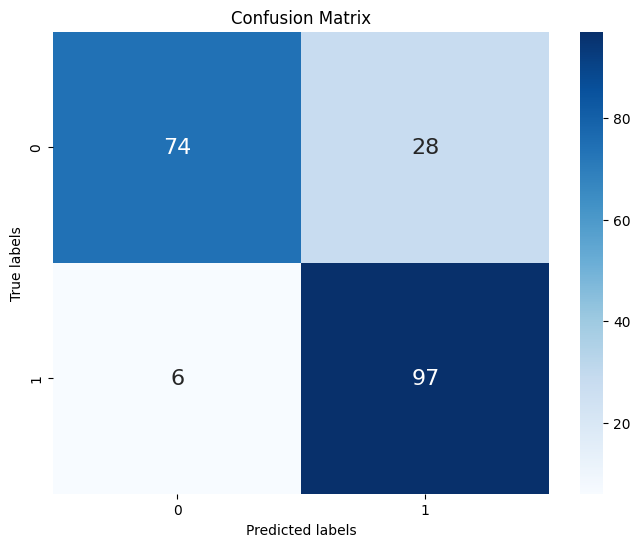

Accuracy: 0.8049 
Precision: 0.7760
Recall (Sensitivity): 0.9417
Specificity: 0.7255
F1 Score: 0.8509


In [ ]:
# Confusion matrix
conf_matrix = np.array([[74, 28],
                        [6, 97]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate metrics
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / np.sum(conf_matrix)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {test_acc:.4f} ")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv


In [ ]:
# Define the Graph Attention Network model
class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes, num_heads=8):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 64, heads=num_heads)
        self.conv2 = GATConv(64 * num_heads, num_classes, heads=1)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GAT(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)  # Adjusted learning rate and weight decay
criterion = torch.nn.CrossEntropyLoss()

# Train the model
def train_gat(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x,graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_gat(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x,graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_gat(model, graph_data)
    acc = test_gat(model, graph_data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc = test_gat(model,y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Epoch: 1, Loss: 0.7489, Accuracy: 0.7549
Epoch: 2, Loss: 0.7096, Accuracy: 0.7683
Epoch: 3, Loss: 0.6661, Accuracy: 0.7902
Epoch: 4, Loss: 0.6232, Accuracy: 0.7988
Epoch: 5, Loss: 0.6010, Accuracy: 0.7988
Epoch: 6, Loss: 0.5772, Accuracy: 0.8122
Epoch: 7, Loss: 0.5708, Accuracy: 0.8171
Epoch: 8, Loss: 0.5763, Accuracy: 0.8171
Epoch: 9, Loss: 0.5705, Accuracy: 0.8195
Epoch: 10, Loss: 0.5554, Accuracy: 0.8256
Epoch: 11, Loss: 0.5544, Accuracy: 0.8293
Epoch: 12, Loss: 0.5460, Accuracy: 0.8256
Epoch: 13, Loss: 0.5275, Accuracy: 0.8220
Epoch: 14, Loss: 0.5422, Accuracy: 0.8220
Epoch: 15, Loss: 0.5268, Accuracy: 0.8256
Epoch: 16, Loss: 0.5549, Accuracy: 0.8329
Epoch: 17, Loss: 0.5803, Accuracy: 0.8341
Epoch: 18, Loss: 0.5249, Accuracy: 0.8378
Epoch: 19, Loss: 0.5474, Accuracy: 0.8378
Epoch: 20, Loss: 0.5348, Accuracy: 0.8378
Epoch: 21, Loss: 0.5259, Accuracy: 0.8415
Epoch: 22, Loss: 0.5343, Accuracy: 0.8415
Epoch: 23, Loss: 0.5505, Accuracy: 0.8378
Epoch: 24, Loss: 0.5214, Accuracy: 0.8378
E

In [ ]:
from sklearn.metrics import confusion_matrix


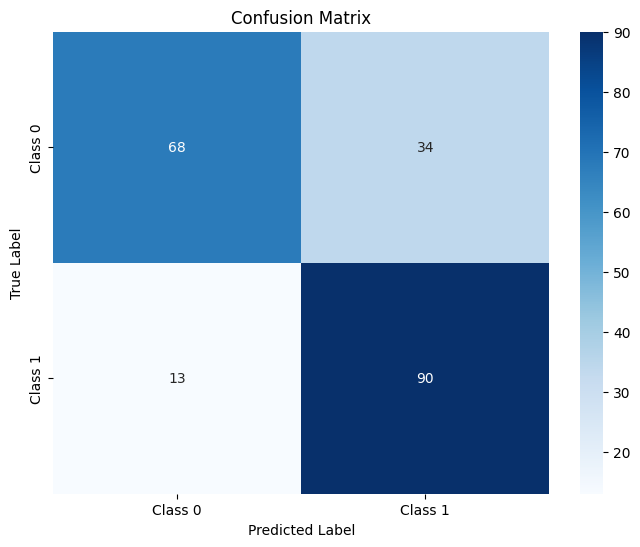

Accuracy: 0.8634
Precision: 0.7258
Recall (Sensitivity): 0.8738
F1 Score: 0.7930
Specificity: 0.6667
Confusion Matrix:
[[68 34]
 [13 90]]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on the test set
with torch.no_grad():
    model.eval()
    logits = model(x_test, edge_index)
    predictions = logits.argmax(dim=1)

# Convert PyTorch tensors to numpy arrays
y_true = y_test.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Define class labels (if applicable)
# Replace this with your actual class labels
classes = ['Class 0', 'Class 1']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get predictions on the test set
with torch.no_grad():
    model.eval()
    logits = model(x_test, edge_index)
    predictions = logits.argmax(dim=1)

# Convert PyTorch tensors to numpy arrays
y_true = y_test.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Compute precision
precision = precision_score(y_true, y_pred)

# Compute recall (sensitivity)
recall = recall_score(y_true, y_pred)

# Compute F1 score
f1 = f1_score(y_true, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)
print(f'Accuracy: {test_acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')
print('Confusion Matrix:')
print(cm)


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv


In [ ]:
# Define the GraphSAGE model
class GraphSAGE(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(num_features, 64)
        self.conv2 = SAGEConv(64, num_classes)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the GraphSAGE model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GraphSAGE(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)  # Adjusted learning rate and weight decay
criterion = torch.nn.CrossEntropyLoss()

# Train the model
def train_graphsage(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out,graph_data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_graphsage(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_graphsage(model, data)
    acc = test_graphsage(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc = test_graphsage(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch: 1, Loss: 0.8090, Accuracy: 0.4073
Epoch: 2, Loss: 0.8170, Accuracy: 0.4171
Epoch: 3, Loss: 0.7987, Accuracy: 0.4256
Epoch: 4, Loss: 0.7884, Accuracy: 0.4366
Epoch: 5, Loss: 0.7743, Accuracy: 0.4402
Epoch: 6, Loss: 0.7723, Accuracy: 0.4463
Epoch: 7, Loss: 0.7583, Accuracy: 0.4549
Epoch: 8, Loss: 0.7465, Accuracy: 0.4683
Epoch: 9, Loss: 0.7525, Accuracy: 0.4732
Epoch: 10, Loss: 0.7421, Accuracy: 0.4841
Epoch: 11, Loss: 0.7322, Accuracy: 0.5012
Epoch: 12, Loss: 0.7391, Accuracy: 0.5134
Epoch: 13, Loss: 0.7358, Accuracy: 0.5195
Epoch: 14, Loss: 0.7228, Accuracy: 0.5268
Epoch: 15, Loss: 0.7337, Accuracy: 0.5366
Epoch: 16, Loss: 0.7302, Accuracy: 0.5524
Epoch: 17, Loss: 0.7122, Accuracy: 0.5671
Epoch: 18, Loss: 0.7165, Accuracy: 0.5927
Epoch: 19, Loss: 0.7015, Accuracy: 0.5988
Epoch: 20, Loss: 0.6932, Accuracy: 0.6159
Epoch: 21, Loss: 0.7023, Accuracy: 0.6390
Epoch: 22, Loss: 0.6897, Accuracy: 0.6512
Epoch: 23, Loss: 0.6880, Accuracy: 0.6659
Epoch: 24, Loss: 0.6684, Accuracy: 0.6817
E

Test Accuracy: 0.8890
Precision: 0.7931
Recall: 0.8932
F1 Score: 0.8402
Specificity: 0.7647
Confusion Matrix:
[[78 24]
 [11 92]]


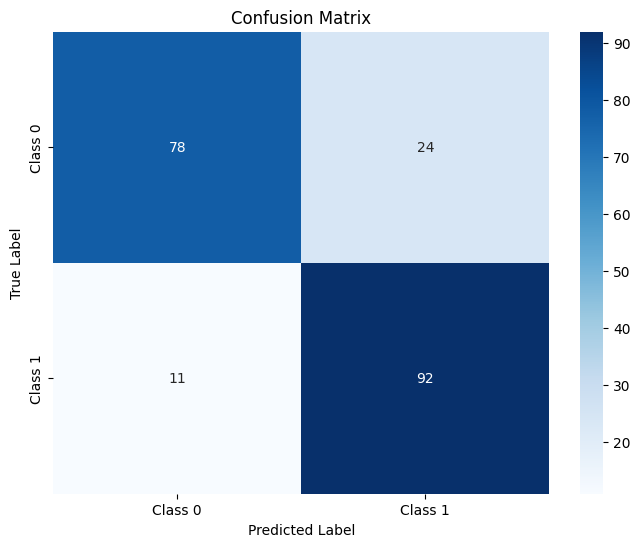

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on the test set
with torch.no_grad():
    model.eval()
    logits = model(x_test, edge_index)
    predictions = logits.argmax(dim=1)

# Convert PyTorch tensors to numpy arrays
y_true = y_test.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Define class labels (if applicable)
# Replace this with your actual class labels
classes = ['Class 0', 'Class 1']
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Compute precision
precision = precision_score(y_true, y_pred)

# Compute recall
recall = recall_score(y_true, y_pred)

# Compute F1 score
f1 = f1_score(y_true, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f'Test Accuracy: {test_acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')
print('Confusion Matrix:')
print(cm)
# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv

class GIN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(num_features, 64), nn.ReLU(), nn.Linear(64, 64)))
        self.conv2 = GINConv(nn.Sequential(nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, num_classes)))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GIN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
def train_gin(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_gin(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_gin(model, data)
    acc = test_gin(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc = test_gin(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch: 1, Loss: 0.6944, Accuracy: 0.4927
Epoch: 2, Loss: 0.6890, Accuracy: 0.4951
Epoch: 3, Loss: 0.6837, Accuracy: 0.5037
Epoch: 4, Loss: 0.6781, Accuracy: 0.5598
Epoch: 5, Loss: 0.6723, Accuracy: 0.6634
Epoch: 6, Loss: 0.6662, Accuracy: 0.7012
Epoch: 7, Loss: 0.6599, Accuracy: 0.7463
Epoch: 8, Loss: 0.6535, Accuracy: 0.7756
Epoch: 9, Loss: 0.6465, Accuracy: 0.7963
Epoch: 10, Loss: 0.6391, Accuracy: 0.8073
Epoch: 11, Loss: 0.6312, Accuracy: 0.7988
Epoch: 12, Loss: 0.6228, Accuracy: 0.8073
Epoch: 13, Loss: 0.6139, Accuracy: 0.8049
Epoch: 14, Loss: 0.6045, Accuracy: 0.8085
Epoch: 15, Loss: 0.5947, Accuracy: 0.8110
Epoch: 16, Loss: 0.5844, Accuracy: 0.8183
Epoch: 17, Loss: 0.5736, Accuracy: 0.8207
Epoch: 18, Loss: 0.5624, Accuracy: 0.8195
Epoch: 19, Loss: 0.5507, Accuracy: 0.8183
Epoch: 20, Loss: 0.5386, Accuracy: 0.8305
Epoch: 21, Loss: 0.5262, Accuracy: 0.8354
Epoch: 22, Loss: 0.5136, Accuracy: 0.8341
Epoch: 23, Loss: 0.5009, Accuracy: 0.8329
Epoch: 24, Loss: 0.4882, Accuracy: 0.8378
E

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv
from torch_geometric.data import Data

class GIN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(num_features, 64), nn.ReLU(), nn.Linear(64, 64)))
        self.conv2 = GINConv(nn.Sequential(nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, num_classes)))
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with probability 0.5

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.conv2(x, edge_index))
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GIN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
def train_gin(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_gin(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_gin(model, data)
    acc = test_gin(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc = test_gin(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch: 1, Loss: 0.6927, Accuracy: 0.4841
Epoch: 2, Loss: 0.6908, Accuracy: 0.4841
Epoch: 3, Loss: 0.6885, Accuracy: 0.4841
Epoch: 4, Loss: 0.6859, Accuracy: 0.4841
Epoch: 5, Loss: 0.6834, Accuracy: 0.4841
Epoch: 6, Loss: 0.6801, Accuracy: 0.4841
Epoch: 7, Loss: 0.6755, Accuracy: 0.4841
Epoch: 8, Loss: 0.6728, Accuracy: 0.4841
Epoch: 9, Loss: 0.6697, Accuracy: 0.4841
Epoch: 10, Loss: 0.6658, Accuracy: 0.4841
Epoch: 11, Loss: 0.6630, Accuracy: 0.4841
Epoch: 12, Loss: 0.6608, Accuracy: 0.4841
Epoch: 13, Loss: 0.6546, Accuracy: 0.4841
Epoch: 14, Loss: 0.6511, Accuracy: 0.4841
Epoch: 15, Loss: 0.6487, Accuracy: 0.4841
Epoch: 16, Loss: 0.6422, Accuracy: 0.4841
Epoch: 17, Loss: 0.6354, Accuracy: 0.4841
Epoch: 18, Loss: 0.6341, Accuracy: 0.4841
Epoch: 19, Loss: 0.6262, Accuracy: 0.4841
Epoch: 20, Loss: 0.6204, Accuracy: 0.4841
Epoch: 21, Loss: 0.6142, Accuracy: 0.4841
Epoch: 22, Loss: 0.6126, Accuracy: 0.4841
Epoch: 23, Loss: 0.6010, Accuracy: 0.4841
Epoch: 24, Loss: 0.6007, Accuracy: 0.4841
E

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv
from torch_geometric.data import Data

class GIN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(num_features, 64), nn.ReLU(), nn.Linear(64, 64)))
        self.conv2 = GINConv(nn.Sequential(nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, num_classes)))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GIN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define label noise percentage
label_noise_percentage = 0.2  # Example: 20% label noise

# Generate random indices for label noise
num_samples = len(y_train)
num_noise_samples = int(num_samples * label_noise_percentage)
noise_indices = torch.randperm(num_samples)[:num_noise_samples]

# Apply label noise to the training labels
y_train_noise = y_train.clone()
y_train_noise[noise_indices] = torch.randint(0, num_classes, (num_noise_samples,))

# Train the model
def train_gin(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, y_train_noise)  # Use noisy labels
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_gin(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y)

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_gin(model, data)
    acc = test_gin(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc = test_gin(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch: 1, Loss: 0.6927, Accuracy: 0.6244
Epoch: 2, Loss: 0.6913, Accuracy: 0.7061
Epoch: 3, Loss: 0.6891, Accuracy: 0.7085
Epoch: 4, Loss: 0.6863, Accuracy: 0.7085
Epoch: 5, Loss: 0.6834, Accuracy: 0.6805
Epoch: 6, Loss: 0.6804, Accuracy: 0.6902
Epoch: 7, Loss: 0.6773, Accuracy: 0.6878
Epoch: 8, Loss: 0.6740, Accuracy: 0.6878
Epoch: 9, Loss: 0.6705, Accuracy: 0.6915
Epoch: 10, Loss: 0.6669, Accuracy: 0.6963
Epoch: 11, Loss: 0.6630, Accuracy: 0.7183
Epoch: 12, Loss: 0.6590, Accuracy: 0.7220
Epoch: 13, Loss: 0.6548, Accuracy: 0.7354
Epoch: 14, Loss: 0.6506, Accuracy: 0.7585
Epoch: 15, Loss: 0.6462, Accuracy: 0.7622
Epoch: 16, Loss: 0.6418, Accuracy: 0.7720
Epoch: 17, Loss: 0.6372, Accuracy: 0.7695
Epoch: 18, Loss: 0.6325, Accuracy: 0.7707
Epoch: 19, Loss: 0.6276, Accuracy: 0.7732
Epoch: 20, Loss: 0.6227, Accuracy: 0.7902
Epoch: 21, Loss: 0.6177, Accuracy: 0.8000
Epoch: 22, Loss: 0.6128, Accuracy: 0.8000
Epoch: 23, Loss: 0.6082, Accuracy: 0.8049
Epoch: 24, Loss: 0.6036, Accuracy: 0.8098
E

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv
from torch_geometric.data import Data
from sklearn.metrics import confusion_matrix

class GIN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(num_features, 64), nn.ReLU(), nn.Linear(64, 64)))
        self.conv2 = GINConv(nn.Sequential(nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, num_classes)))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_features = x_train.shape[1]
num_classes = len(torch.unique(y_train))
model = GIN(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define label noise percentage
label_noise_percentage = 0.2  # Example: 20% label noise

# Generate random indices for label noise
num_samples = len(y_train)
num_noise_samples = int(num_samples * label_noise_percentage)
noise_indices = torch.randperm(num_samples)[:num_noise_samples]

# Apply label noise to the training labels
y_train_noise = y_train.clone()
y_train_noise[noise_indices] = torch.randint(0, num_classes, (num_noise_samples,))

# Train the model
def train_gin(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, y_train_noise)  # Use noisy labels
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test_gin(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)
        correct = pred.eq(graph_data.y).sum().item()
        return correct / len(graph_data.y), pred.cpu().numpy(), graph_data.y.cpu().numpy()

# Main training loop
for epoch in range(500):  # Increased number of epochs
    loss = train_gin(model, data)
    acc, pred, true = test_gin(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# Test the model on the test set
test_acc, test_pred, test_true = test_gin(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true, test_pred)
print("Confusion Matrix:")
print(conf_matrix)


Epoch: 1, Loss: 0.6932, Accuracy: 0.4866
Epoch: 2, Loss: 0.6928, Accuracy: 0.4878
Epoch: 3, Loss: 0.6926, Accuracy: 0.4878
Epoch: 4, Loss: 0.6922, Accuracy: 0.4878
Epoch: 5, Loss: 0.6915, Accuracy: 0.4878
Epoch: 6, Loss: 0.6904, Accuracy: 0.4878
Epoch: 7, Loss: 0.6892, Accuracy: 0.4866
Epoch: 8, Loss: 0.6876, Accuracy: 0.4902
Epoch: 9, Loss: 0.6855, Accuracy: 0.4951
Epoch: 10, Loss: 0.6832, Accuracy: 0.4988
Epoch: 11, Loss: 0.6805, Accuracy: 0.5073
Epoch: 12, Loss: 0.6777, Accuracy: 0.5159
Epoch: 13, Loss: 0.6744, Accuracy: 0.5329
Epoch: 14, Loss: 0.6709, Accuracy: 0.5537
Epoch: 15, Loss: 0.6669, Accuracy: 0.5878
Epoch: 16, Loss: 0.6624, Accuracy: 0.5939
Epoch: 17, Loss: 0.6575, Accuracy: 0.6622
Epoch: 18, Loss: 0.6521, Accuracy: 0.7122
Epoch: 19, Loss: 0.6459, Accuracy: 0.7463
Epoch: 20, Loss: 0.6391, Accuracy: 0.7902
Epoch: 21, Loss: 0.6317, Accuracy: 0.8171
Epoch: 22, Loss: 0.6236, Accuracy: 0.8305
Epoch: 23, Loss: 0.6150, Accuracy: 0.8354
Epoch: 24, Loss: 0.6059, Accuracy: 0.8390
E

Test Accuracy: 0.9415
Confusion Matrix:
[[356  41]
 [  7 416]]
Precision: 0.9102844638949672
Recall: 0.983451536643026
F1 Score: 0.9454545454545454
Accuracy: 0.9414634146341463
Specificity: 0.8967254408060453


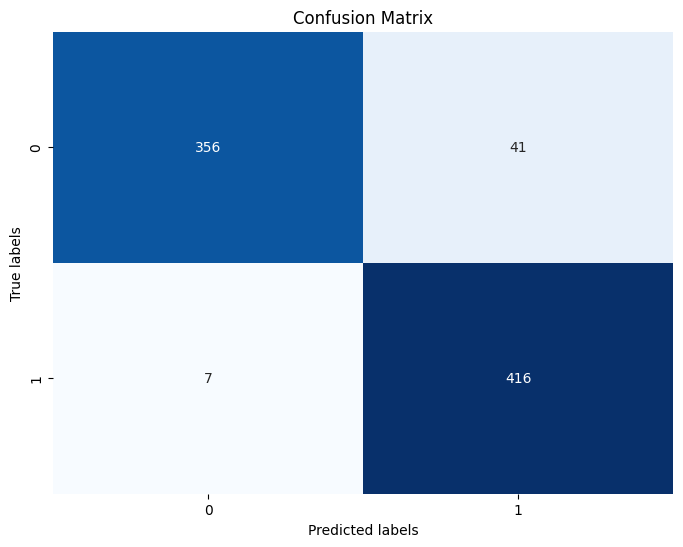

In [ ]:
test_acc, test_pred, test_true = test_gin(model, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true, test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate evaluation metrics
precision = precision_score(test_true, test_pred)
recall = recall_score(test_true, test_pred)
f1 = f1_score(test_true, test_pred)
accuracy = accuracy_score(test_true, test_pred)

# Calculate specificity (TN / (TN + FP))
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Specificity:", specificity)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()